In [86]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score

In [3]:
#file paths
input_path ="C:\\Users\\admin\\python\\GUIDE_train.csv"
data=pd.read_csv(input_path)

In [5]:
data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [23]:
data.isnull().sum()* 100

Id                            0
OrgId                         0
IncidentId                    0
AlertId                       0
Timestamp                     0
DetectorId                    0
AlertTitle                    0
Category                      0
MitreTechniques       546838600
IncidentGrade           5134000
ActionGrouped         946077300
ActionGranular        946077300
EntityType                    0
EvidenceRole                  0
DeviceId                      0
Sha256                        0
IpAddress                     0
Url                           0
AccountSid                    0
AccountUpn                    0
AccountObjectId               0
AccountName                   0
DeviceName                    0
NetworkMessageId              0
EmailClusterId        942002500
RegistryKey                   0
RegistryValueName             0
RegistryValueData             0
ApplicationId                 0
ApplicationName               0
OAuthApplicationId            0
ThreatFa

In [9]:
data.shape

(9516837, 45)

In [7]:
#removing 50% and above missing data

threshold = len(data)*0.4
data = data.dropna(thresh=threshold,axis=1)

In [29]:
data.shape

(9516837, 36)

In [13]:
data.duplicated().sum()

546298

In [9]:
data.drop_duplicates()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [153]:
data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
CountryCod

In [11]:
#mode imputation because of catagorial columns
data["IncidentGrade"].fillna(data["IncidentGrade"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11392\3017238057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["IncidentGrade"].fillna(data["IncidentGrade"].mode()[0],inplace=True)


In [21]:
data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade               0
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
CountryCod

In [23]:
data["Timestamp"]

0          2024-06-04T06:05:15.000Z
1          2024-06-14T03:01:25.000Z
2          2024-06-13T04:52:55.000Z
3          2024-06-10T16:39:36.000Z
4          2024-06-15T01:08:07.000Z
                     ...           
9516832    2024-06-08T15:26:08.000Z
9516833    2024-06-06T09:40:08.000Z
9516834    2024-06-11T22:51:03.000Z
9516835    2024-05-20T23:01:01.000Z
9516836    2024-06-03T23:51:52.000Z
Name: Timestamp, Length: 9516837, dtype: object

In [13]:
data["Timestamp"] = data["Timestamp"].str.replace(r"\.\d{3}Z$","Z",regex=True)

In [27]:
data["Timestamp"]

0          2024-06-04T06:05:15Z
1          2024-06-14T03:01:25Z
2          2024-06-13T04:52:55Z
3          2024-06-10T16:39:36Z
4          2024-06-15T01:08:07Z
                   ...         
9516832    2024-06-08T15:26:08Z
9516833    2024-06-06T09:40:08Z
9516834    2024-06-11T22:51:03Z
9516835    2024-05-20T23:01:01Z
9516836    2024-06-03T23:51:52Z
Name: Timestamp, Length: 9516837, dtype: object

In [15]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

In [49]:
data["Timestamp"] 

0         2024-06-04 06:05:15+00:00
1         2024-06-14 03:01:25+00:00
2         2024-06-13 04:52:55+00:00
3         2024-06-10 16:39:36+00:00
4         2024-06-15 01:08:07+00:00
                     ...           
9516832   2024-06-08 15:26:08+00:00
9516833   2024-06-06 09:40:08+00:00
9516834   2024-06-11 22:51:03+00:00
9516835   2024-05-20 23:01:01+00:00
9516836   2024-06-03 23:51:52+00:00
Name: Timestamp, Length: 9516837, dtype: datetime64[ns, UTC]

In [17]:
data["Day"] = data["Timestamp"].dt.day
data["Month"] = data["Timestamp"].dt.month
data["Year"] = data["Timestamp"].dt.year
data["Hour"] = data["Timestamp"].dt.hour
data["Time"] =data["Timestamp"].dt.time

In [19]:
data.drop("Timestamp",axis=1,inplace=True)

In [171]:
pd.set_option("display.max_columns", None)
data.head(1)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,7,6,InitialAccess,NaN,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,4,6,2024,6,06:05:15


In [42]:
data["FolderPath"].value_counts()

FolderPath
117668    8641204
0          113784
1           70685
2           60963
3           39980
           ...   
91008           1
79260           1
46080           1
94902           1
114529          1
Name: count, Length: 87832, dtype: int64

In [44]:
data["OSFamily"].value_counts()

OSFamily
5    9322565
0     190036
1       2732
2       1496
3          7
4          1
Name: count, dtype: int64

In [59]:
data["OSVersion"].value_counts()

OSVersion
66    9322572
0      187405
2        1892
1        1652
3        1125
4         732
6         362
5         266
8         132
9         109
10         89
7          81
11         66
12         54
16         38
13         32
14         31
15         22
19         18
17         17
20         16
22         15
21         14
24         13
26          7
25          7
27          6
31          5
28          5
35          4
33          4
40          3
38          3
37          3
41          3
42          3
29          3
23          2
45          2
30          2
34          2
44          2
46          2
43          2
65          1
59          1
63          1
53          1
62          1
36          1
58          1
48          1
64          1
51          1
56          1
52          1
47          1
60          1
Name: count, dtype: int64

In [57]:
data["AlertTitle"].value_counts()

AlertTitle
0         1332232
1          774539
2          597497
4          413879
3          412087
           ...   
111797          1
106429          1
110942          1
110257          1
110883          1
Name: count, Length: 86149, dtype: int64

In [53]:
data["OSVersion"].value_counts()

OSVersion
66    9322572
0      187405
2        1892
1        1652
3        1125
4         732
6         362
5         266
8         132
9         109
10         89
7          81
11         66
12         54
16         38
13         32
14         31
15         22
19         18
17         17
20         16
22         15
21         14
24         13
26          7
25          7
27          6
31          5
28          5
35          4
33          4
40          3
38          3
37          3
41          3
42          3
29          3
23          2
45          2
30          2
34          2
44          2
46          2
43          2
65          1
59          1
63          1
53          1
62          1
36          1
58          1
48          1
64          1
51          1
56          1
52          1
47          1
60          1
Name: count, dtype: int64

In [46]:
data["ResourceIdName"].value_counts()

ResourceIdName
3586    9508671
0           390
1           329
2           274
3           253
         ...   
2242          1
3072          1
3136          1
2156          1
3316          1
Name: count, Length: 2309, dtype: int64

In [48]:
data["EntityType"].value_counts()

EntityType
Ip                       2181194
User                     1932416
MailMessage              1173154
Machine                   699208
File                      688402
Url                       682578
CloudLogonRequest         638565
Mailbox                   483158
Process                   345732
MailCluster               224684
CloudApplication          216811
CloudLogonSession         212382
RegistryValue              11209
AzureResource               8166
RegistryKey                 7277
GenericEntity               4294
OAuthApplication            2595
Malware                     2580
SecurityGroup               1518
BlobContainer                306
Blob                         263
MailboxConfiguration         226
Nic                           49
IoTDevice                     31
ActiveDirectoryDomain         11
GoogleCloudResource           10
AmazonResource                 6
Container                      2
KubernetesCluster              2
ContainerImage                 2

In [50]:
data["MitreTechniques"].value_counts()

MitreTechniques
T1078;T1078.004                                        1354904
T1566.002                                               814308
T1566                                                   659591
T1133                                                   145579
T1566.001                                               136892
                                                        ...   
T1084                                                        1
T1055;T1055.003;T1055.012;T1059;T1059.001;T1106              1
T1003.001;T1055;T1055.003;T1055.012;T1106;T1550.002          1
T1055;T1055.002;T1055.003;T1055.012;T1078;T1106              1
T1078;T1078.001                                              1
Name: count, Length: 1193, dtype: int64

In [21]:
# Analyze the relationship between missing MitreTechniques and IncidentGrade
missing_data = data.groupby(data["MitreTechniques"].isnull())['IncidentGrade'].value_counts()
print(missing_data)


MitreTechniques  IncidentGrade 
False            TruePositive      1657954
                 BenignPositive    1395865
                 FalsePositive      994632
True             BenignPositive    2766292
                 TruePositive      1664759
                 FalsePositive     1037335
Name: count, dtype: int64


In [23]:
# Group by IncidentGrade and MitreTechniques and count occurrences
technique_counts=data.groupby(["IncidentGrade", "MitreTechniques"]).size().reset_index(name="count")

In [177]:
technique_counts

,IncidentGrade,MitreTechniques,count
0,BenignPositive,T0807,380
1,BenignPositive,T0807;T1204,8
2,BenignPositive,T0814,3
3,BenignPositive,T0820;T0816,595
4,BenignPositive,T0820;T0853;T0807;T0866,12
...,...,...,...
1990,TruePositive,T1598;T1566,2
1991,TruePositive,T1603,1
1992,TruePositive,T1616;T1090,4
1993,TruePositive,T1621;T1078,9


In [25]:
# Sort the counts to find the most frequent techniques for each grade
sorted_techniques= technique_counts.sort_values(["IncidentGrade","count"],ascending=[True, False])

In [181]:
sorted_techniques

,IncidentGrade,MitreTechniques,count
963,BenignPositive,T1566.002,392622
960,BenignPositive,T1566,349864
961,BenignPositive,T1566.001,90702
934,BenignPositive,T1559;T1106;T1059.005,37869
605,BenignPositive,T1078;T1078.004,36622
...,...,...,...
1576,TruePositive,T0865;T1566;T1098;T1078,1
1791,TruePositive,T1070;T1562,1
1837,TruePositive,T1098;T1556,1
1989,TruePositive,T1595;T1464,1


In [27]:
# Get the most common MitreTechnique for each IncidentGrade
most_common=sorted_techniques.loc[sorted_techniques.groupby("IncidentGrade")["count"].idxmax()]

In [185]:
most_common

,IncidentGrade,MitreTechniques,count
963,BenignPositive,T1566.002,392622
1318,FalsePositive,T1078;T1078.004,308347
1810,TruePositive,T1078;T1078.004,1009935


In [29]:
# Example fill mapping based on your results
fill_mapping = {
    "BenignPositive":"T1566.002",
    "FalsePositive":"T1078;T1078.004",
    "TruePositive":"T1078;T1078.004"
}

In [31]:
# Fill missing MitreTechniques based on IncidentGrade
for grade,technique in fill_mapping.items():
    data.loc[data["IncidentGrade"] == grade,"MitreTechniques"] = data["MitreTechniques"].fillna(technique)

In [33]:
data["MitreTechniques"].isnull().sum()

0

In [76]:
data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Day                   0
Month                 0
Year                  0
Time                  0
dtype: int64

# DATA VISUALIZATION BEFORE ENCODING

In [35]:
# Barplot for PrimaryMitreTechniques and IncidentGrade

# Create a new column with only the first technique
data["PrimaryMitreTechniques"] = data["MitreTechniques"].map(lambda x: x.split(";")[0])

In [37]:
grouped_data=data.groupby(["PrimaryMitreTechniques","IncidentGrade"]).size().reset_index(name="count")

In [225]:
#unique_grouped_data = grouped_data.drop_duplicates(subset=["PrimaryMitreTechniques"])

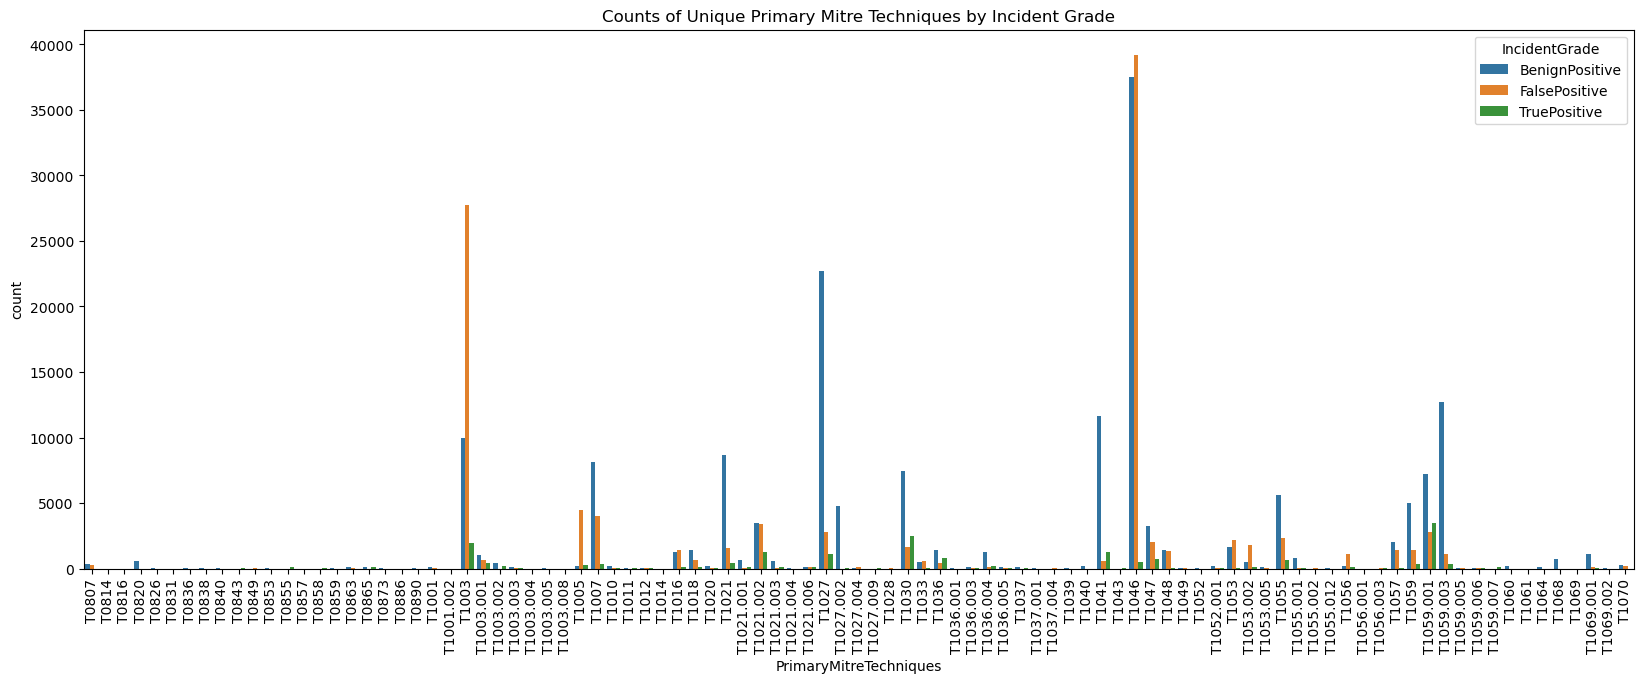

In [39]:
plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data.head(200),x="PrimaryMitreTechniques",y="count",hue="IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of Unique Primary Mitre Techniques by Incident Grade")
plt.show()

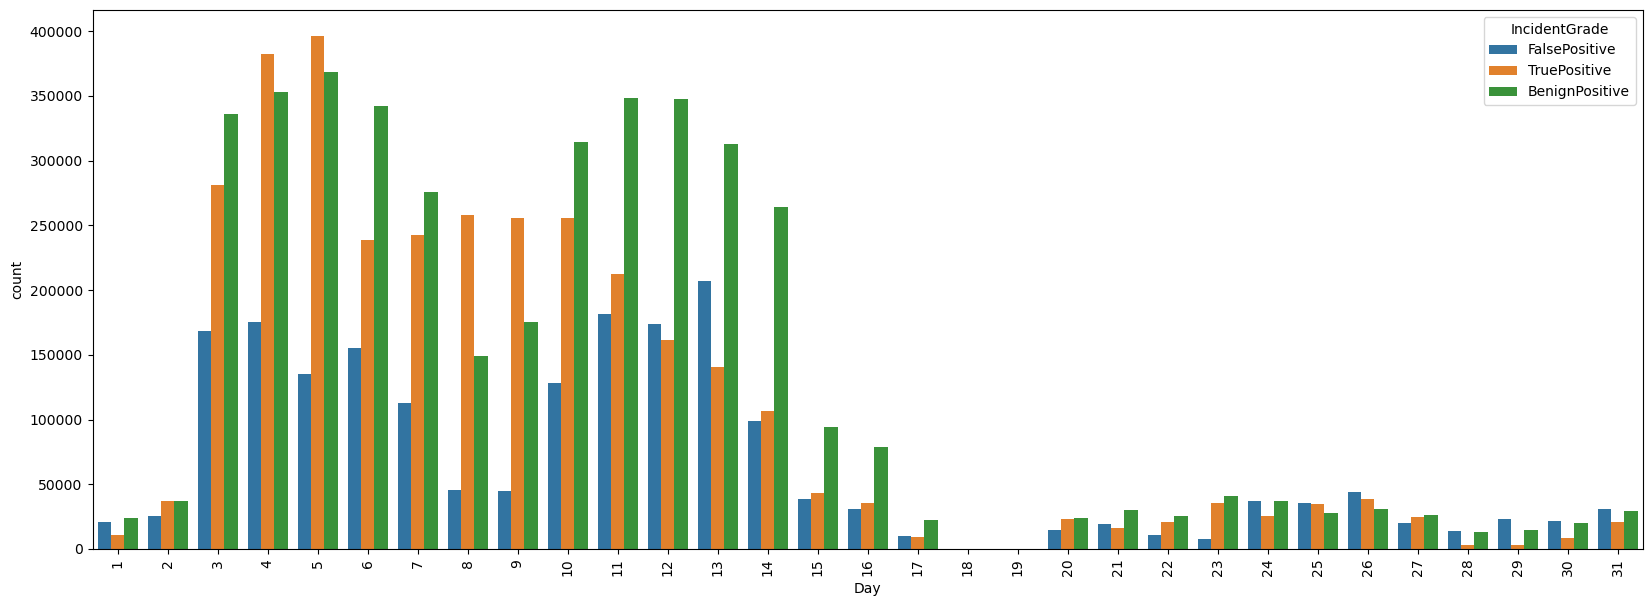

In [123]:
# Barplot for days vs incident grade

plt.figure(figsize=(20,7))
sns.countplot(data=data,x="Day",hue="IncidentGrade")
plt.xticks(rotation=90)
plt.show()

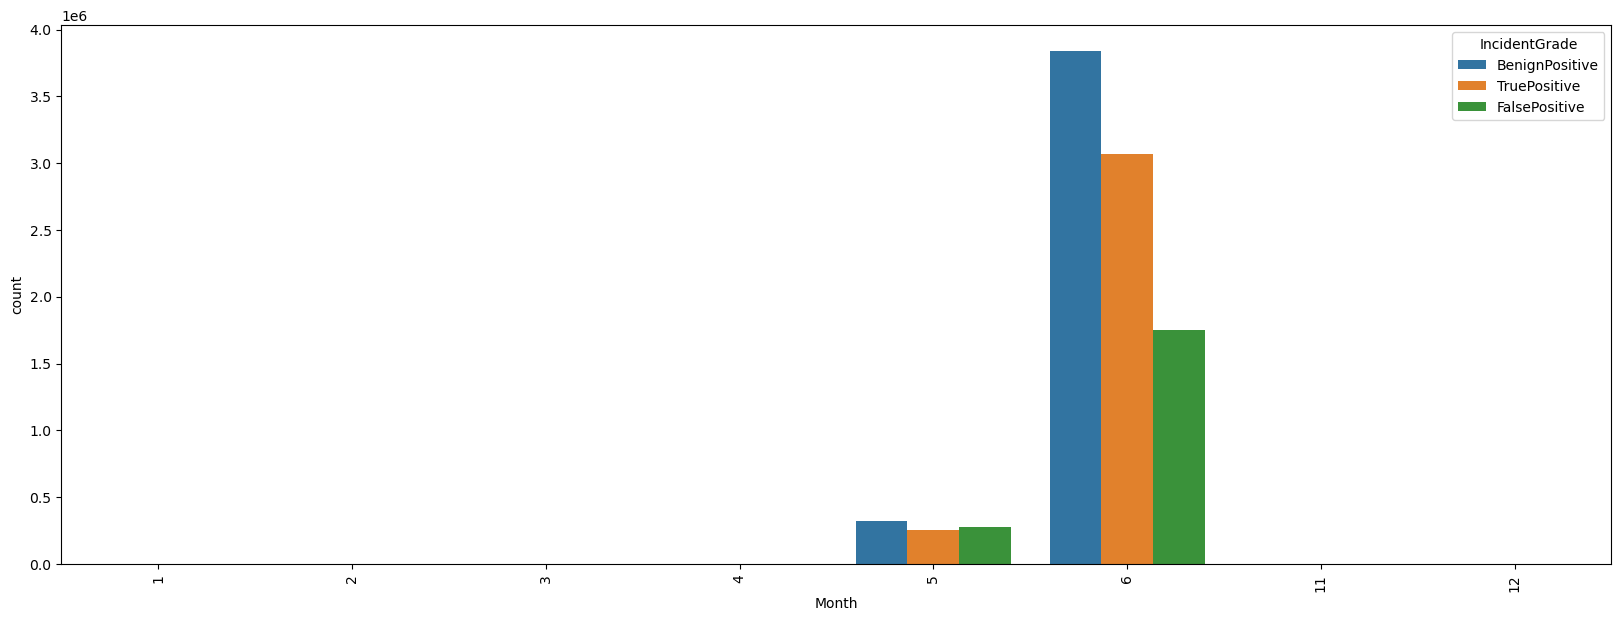

In [127]:
# Barplot for weeks vs incident grade

plt.figure(figsize=(20,7))
sns.countplot(data=data,x="Month",hue="IncidentGrade")
plt.xticks(rotation=90)
plt.show()

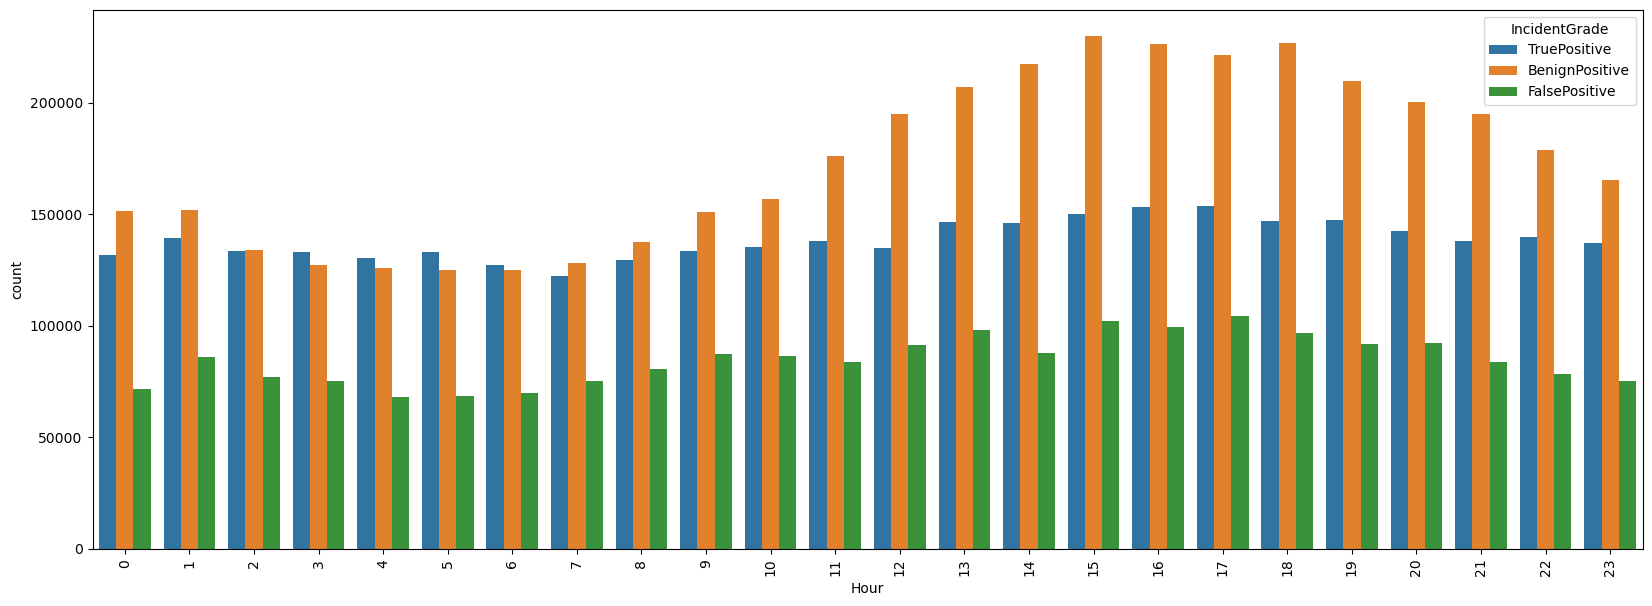

In [197]:
# Barplot for weeks vs incident grade

plt.figure(figsize=(20,7))
sns.countplot(data=data,x="Hour",hue="IncidentGrade")
plt.xticks(rotation=90)
plt.show()

In [41]:
output_path ="C:\\Users\\admin\\python\\data_cleaningtr.csv"
data.to_csv(output_path, index=False)

# ENCODING TRAIN DATASET

In [3]:
input_path ="C:\\Users\\admin\\python\\data_cleaningtr.csv"
data_cleaned=pd.read_csv(input_path) 

In [79]:
#LABEL ENCODER

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 41 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id                      int64 
 1   OrgId                   int64 
 2   IncidentId              int64 
 3   AlertId                 int64 
 4   DetectorId              int64 
 5   AlertTitle              int64 
 6   Category                object
 7   MitreTechniques         object
 8   IncidentGrade           object
 9   EntityType              object
 10  EvidenceRole            object
 11  DeviceId                int64 
 12  Sha256                  int64 
 13  IpAddress               int64 
 14  Url                     int64 
 15  AccountSid              int64 
 16  AccountUpn              int64 
 17  AccountObjectId         int64 
 18  AccountName             int64 
 19  DeviceName              int64 
 20  NetworkMessageId        int64 
 21  RegistryKey             int64 
 22  RegistryValueName 

In [81]:
data_cleaned.select_dtypes(include=["object"]).columns

Index(['Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'Time', 'PrimaryMitreTechniques'],
      dtype='object')

In [5]:
categorical_columns=["Category","MitreTechniques","IncidentGrade","EntityType","EvidenceRole","Time","PrimaryMitreTechniques","OSFamily"]

In [7]:
encoders = {}

In [9]:
for i in categorical_columns:
    le=LabelEncoder()
    data_cleaned[i]= le.fit_transform(data_cleaned[i])
    encoders[i]=le

In [11]:
# Save the encoders dictionary
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [18]:
# STANDARDSCALER

data_cleaned.select_dtypes(include=["int32","int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Day', 'Month',
       'Year', 'Hour', 'Time', 'PrimaryMitreTechniques'],
      dtype='object')

In [97]:
# List of columns to drop (as discussed earlier)
# columns_to_drop = [
#     'DetectorId', 'Sha256', 'IpAddress', 'Url',
#     'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 
#     'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
#     'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
#     'FolderPath', 'ResourceIdName', 'State', 'City'
# ]

# data_cleaned.drop(columns=columns_to_drop, inplace=True)



In [99]:
data.select_dtypes(include=["int32","int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'MitreTechniques', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'OSFamily', 'OSVersion', 'Day', 'Month', 'Year', 'Hour', 'Time',
       'PrimaryMitreTechniques'],
      dtype='object')

In [13]:
numeric_columns = ['DetectorId', 'Sha256', 'IpAddress', 'Url',
    'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 
    'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
    'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
    'FolderPath', 'ResourceIdName', 'State', 'City','Id', 'OrgId', 'IncidentId', 'AlertId','AlertTitle','OSVersion', 'Day', 'Month', 'Year', 'Hour', 'Time','CountryCode','EvidenceRole','AccountSid','FileName','DeviceId']


In [17]:
# Initialize and fit the scaler for numerical columns
scaler = StandardScaler()

In [19]:
data_cleaned[numeric_columns] =scaler.fit_transform(data_cleaned[numeric_columns])

In [21]:
# Save the scaler
with open("scaler.pkl","wb") as s:
    pickle.dump(scaler,s)

In [108]:
data_cleaned.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,...,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time,PrimaryMitreTechniques
0,-1.334329,-0.469468,-0.579720,-0.616770,-0.238271,-0.256626,10,705,2,15,...,0.14433,-3.068193,-3.833510,-3.810471,-0.941726,0.310598,0.004337,-0.907286,-0.967568,104
1,-0.780419,-0.241947,-0.582086,-0.427806,-0.121057,-0.253397,7,705,1,32,...,0.14433,0.291824,0.266429,0.266155,0.682940,0.310598,0.004337,-1.349666,-1.419056,104
2,0.431260,1.622169,-0.101885,0.666231,0.717823,-0.231149,10,864,1,31,...,0.14433,0.291824,0.266429,0.266155,0.520473,0.310598,0.004337,-1.202206,-1.145216,157
3,0.881312,-0.231605,-0.311755,0.800775,-0.249762,-0.256975,1,1108,0,31,...,0.14433,0.291824,0.266429,0.266155,0.033073,0.310598,0.004337,0.567314,0.590374,287
4,-1.265091,-0.086820,-0.548711,-0.475694,-0.233674,-0.250693,6,705,2,32,...,0.14433,0.291824,0.266429,0.266155,0.845406,0.310598,0.004337,-1.644586,-1.697317,104


In [113]:
#data.drop(["Id","OrgId","IncidentId","AlertId"],axis=1,inplace=True)

In [115]:
# Feature selection

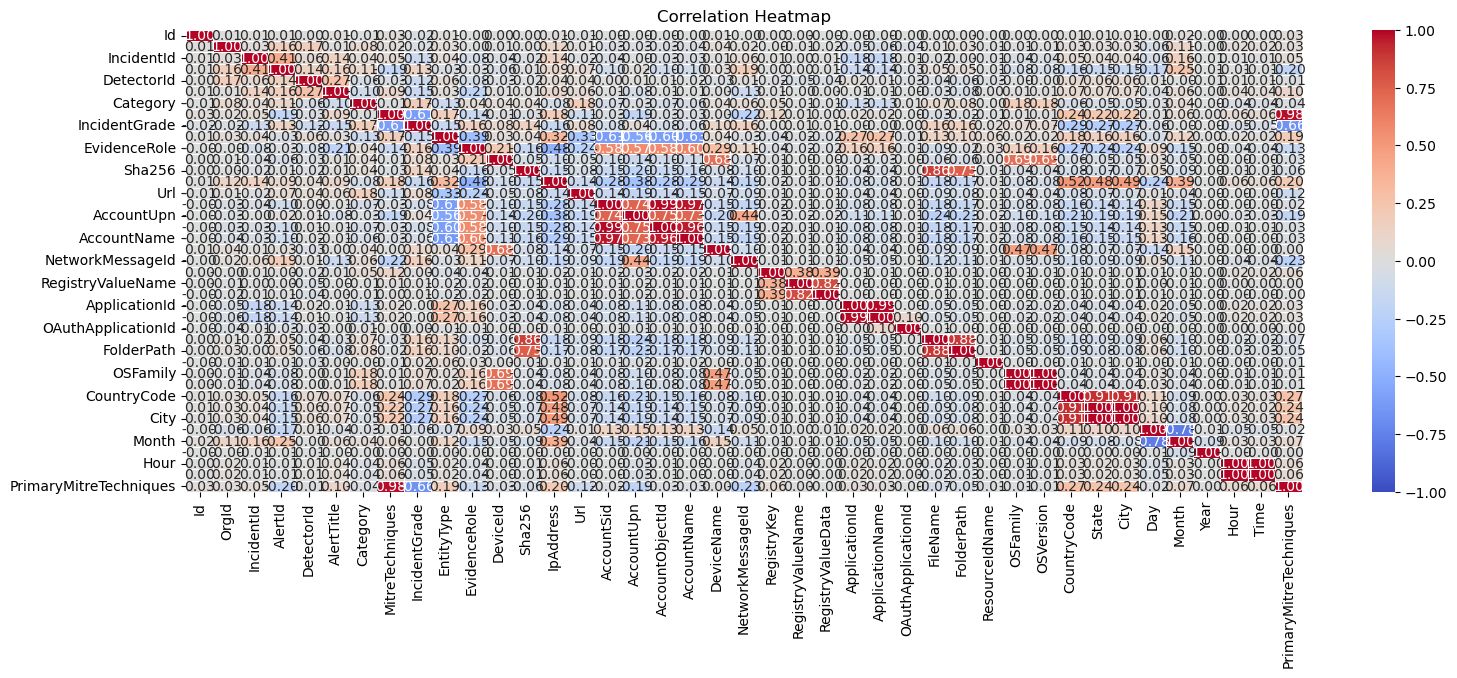

In [41]:
plt.figure(figsize=(18,6))
sns.heatmap(data=data_cleaned.corr(),annot=True,fmt=".2f",cmap="coolwarm",vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [110]:
# Removing columns which as above 70% correlation

# threshold = 0.7
# columns_to_drop= set()

# for i in range(len(data_cleaned.corr().columns)):
#     for j in range(i):
#        if data_cleaned.corr().iloc[i][j] >threshold:
#            colname=data_cleaned.corr().columns[i]
#            columns_to_drop.add(colname)
           
# data_cleaned= data_cleaned.drop(columns=list(columns_to_drop))           

# TRAIN TEST SPLIT

In [37]:
data_cleaned.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,...,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time,PrimaryMitreTechniques
0,-1.334329,-0.469468,-0.579720,-0.616770,-0.238271,-0.256626,10,705,2,15,...,0.14433,-3.068193,-3.833510,-3.810471,-0.941726,0.310598,0.004337,-0.907286,-0.967568,104
1,-0.780419,-0.241947,-0.582086,-0.427806,-0.121057,-0.253397,7,705,1,32,...,0.14433,0.291824,0.266429,0.266155,0.682940,0.310598,0.004337,-1.349666,-1.419056,104
2,0.431260,1.622169,-0.101885,0.666231,0.717823,-0.231149,10,864,1,31,...,0.14433,0.291824,0.266429,0.266155,0.520473,0.310598,0.004337,-1.202206,-1.145216,157
3,0.881312,-0.231605,-0.311755,0.800775,-0.249762,-0.256975,1,1108,0,31,...,0.14433,0.291824,0.266429,0.266155,0.033073,0.310598,0.004337,0.567314,0.590374,287
4,-1.265091,-0.086820,-0.548711,-0.475694,-0.233674,-0.250693,6,705,2,32,...,0.14433,0.291824,0.266429,0.266155,0.845406,0.310598,0.004337,-1.644586,-1.697317,104


In [23]:
X= data_cleaned.drop("IncidentGrade",axis=1)

In [25]:
y= data_cleaned["IncidentGrade"]

In [27]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
#Feature selection random forest
rf = RandomForestClassifier(n_estimators=100, random_state=100, n_jobs=-1)

In [35]:
rf.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=100)

In [47]:
fs_score=pd.DataFrame({
    "columns":X.columns,
    "score": rf.feature_importances_
}).sort_values("score",ascending=False)

In [51]:
fs_score

,columns,score
39,PrimaryMitreTechniques,0.172375
1,OrgId,0.168714
7,MitreTechniques,0.142754
2,IncidentId,0.089896
4,DetectorId,0.070829
3,AlertId,0.067787
5,AlertTitle,0.063433
6,Category,0.037176
34,Day,0.028335
0,Id,0.021915


In [49]:
list(fs_score.head(11)["columns"].values)

['PrimaryMitreTechniques',
 'OrgId',
 'MitreTechniques',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Category',
 'Day',
 'Id',
 'Time']

In [53]:
selected_features =list(fs_score.sort_values("score",ascending=False).head(8)["columns"].values)

In [55]:
X=X[selected_features]

In [61]:
data_x = X.corr()

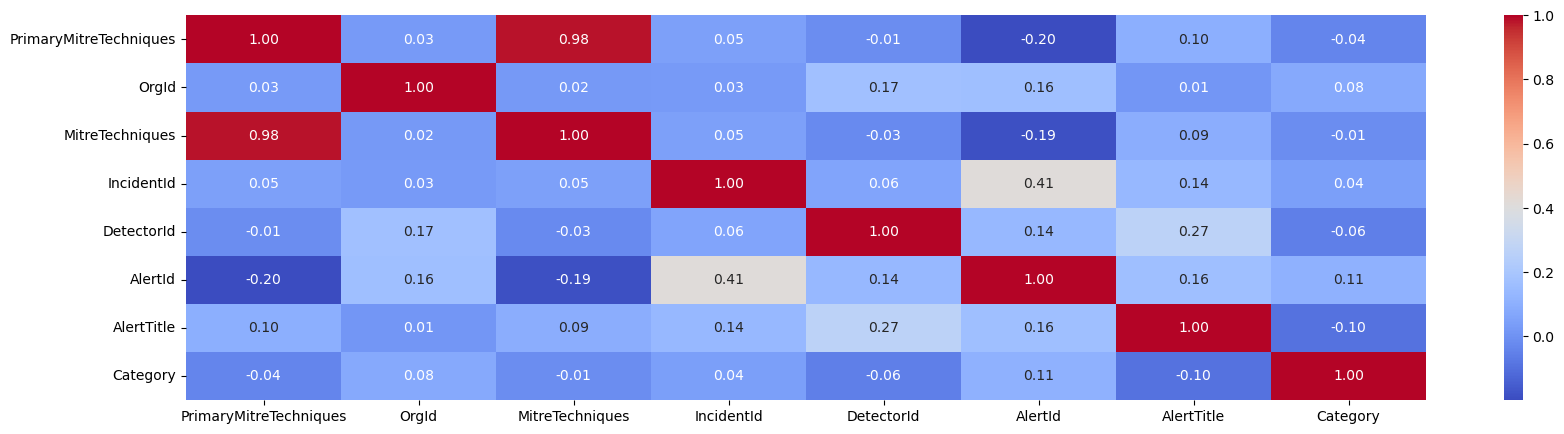

In [63]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_x,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [65]:
X.drop("MitreTechniques",axis=1,inplace=True)

# MODEL BUILDING

In [78]:
#decision tree

X_train.shape

(7613469, 40)

In [80]:
X_valid.shape

(1903368, 40)

In [82]:
# Initialize the models

dt_model= DecisionTreeClassifier(max_depth=10,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [84]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [108]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100 

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [90]:
dttr_pred =dt_model.predict(X_train)
dtvd_pred =dt_model.predict(X_valid)

In [110]:
dttrain_metrics=metrics(y_train,dttr_pred)

In [116]:
dtvalid_metrics=metrics(y_valid,dtvd_pred)

In [122]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Validation":dtvalid_metrics["Values"]
}).reset_index()

,Metrics,Training,Validation
0,Accuracy,83.524081,83.529722
1,Precision,82.201450,82.198456
2,Recall,80.710427,80.715675
3,Macro F1,81.300351,81.302141


In [124]:
# RANDOM FOREST
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=100)

In [134]:
rftr_pred =rf.predict(X_train)
rfvd_pred =rf.predict(X_valid)

In [136]:
rftrain_metrics=metrics(y_train,rftr_pred)
rfvalid_metrics=metrics(y_valid,rfvd_pred)

In [138]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Validation":rfvalid_metrics["Values"]
}).reset_index()

,Metrics,Training,Validation
0,Accuracy,100.0,99.331238
1,Precision,100.0,99.189616
2,Recall,100.0,99.244463
3,Macro F1,100.0,99.216788


In [144]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=100,learning_rate=0.05,random_state=100,n_jobs=-1)

In [146]:
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [148]:
xgbtr_pred =xgbmodel.predict(X_train)
xgbvd_pred =xgbmodel.predict(X_valid)

In [150]:
xgbtrain_metrics = metrics(y_train,xgbtr_pred)
xgbvalid_metrics =metrics(y_valid,xgbvd_pred)

In [152]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Validation":xgbvalid_metrics["Values"]
}).reset_index()

,Metrics,Training,Validation
0,Accuracy,89.797174,89.810904
1,Precision,89.890043,89.907743
2,Recall,87.775090,87.794152
3,Macro F1,88.627237,88.645891
